# Análisis de covarianza

In [1]:
datos<-read.csv("/home/lorena/Escritorio/Estadistica aplicada y R/Literatura/Analisis_de_covarianza/Base_de_datos_ANCOVA_fabrica_textil.csv",header=TRUE)

Para este análisis necesitamos la libreria **car**.

In [3]:
install.packages('car')

also installing the dependencies ‘broom’, ‘SparseM’, ‘MatrixModels’, ‘sp’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘maptools’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [4]:
library(car)

Loading required package: carData



In [10]:
library(carData)

Ahora, definimos qué variables son categóricas de nuestros datos, y a su vez,le asignamos a cada una un nombre.

En este modelo la resistencia es la variable respuesta, el diámetro es la covariable y la máquida es el factor de interés.

In [5]:
maquina<-as.factor(datos$maquina)
resistencia<-(datos$resistencia)
diametro<-(datos$diametro)

## Definiendo el modelo

In [6]:
m1<-lm(resistencia ~diametro+maquina)

Pedimos los parámetros del modelo mediante la función **summary**:

In [7]:
summary(m1)


Call:
lm(formula = resistencia ~ diametro + maquina)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.57670 -0.68922 -0.08427  0.93408  2.36951 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -12.3012     4.5368  -2.711   0.0202 *  
diametro      0.9058     0.1083   8.365 4.26e-06 ***
maquina2     -0.8305     1.0021  -0.829   0.4249    
maquina3      0.8915     1.1438   0.779   0.4522    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.554 on 11 degrees of freedom
Multiple R-squared:  0.8985,	Adjusted R-squared:  0.8708 
F-statistic: 32.45 on 3 and 11 DF,  p-value: 9.274e-06


Se está reparametrizando con respecto a la **máquina 1**. Las variables indicadoras se construyen como $0$ y $1$. Así, al ver la variable categórica **máquina** y nos enfocamos en la máquina 2: tenemos uno si la tenemos, cero si no. La misma construcción se hace para cuando nos enfocamos en la máquina 3.

Sólo se necesitan $k-1$ variables indicadoras para indicar la pertenencia al grupo, aquí, $k$ es el número de grupos.

**Tabla de parámetros**: vemos que el diámetro y la intercepción tienen diferencias estadísticamente significativas.

También podemos pedir los parámetros para el modelo de análisis de varianza (aov):

In [9]:
summary(aov(m1))

            Df Sum Sq Mean Sq F value   Pr(>F)    
diametro     1 230.55  230.55  95.437 9.33e-07 ***
maquina      2   4.61    2.30   0.954    0.415    
Residuals   11  26.57    2.42                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

## Coeficientes del modelo 

In [11]:
m1$coefficients

(Intercept)    diametro    maquina2    maquina3 
-12.3011650   0.9058252  -0.8304854   0.8914563

## ANOVA 

Vamos a hacer un análisis de varianza sin interacción, así que en la función **Anova** agregamos el parámetro **type = III**:

In [12]:
Anova(m1,type ="III")

,Sum Sq,Df,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),17.760002,1,7.3518212,2.023930e-02
diametro,169.026990,1,69.9693755,4.264464e-06
maquina,4.609631,2,0.9540872,4.148616e-01
Residuals,26.573010,11,NA,NA


In [13]:
help(Anova)

Warning message in seq_len(head.end.idx):
“first element used of 'length.out' argument”
ERROR while rich displaying an object: Error in seq_len(head.end.idx): argument must be coercible to non-negative integer

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_conte

**Pruebas de hipótesis que se prueban:**
* $H_0$: La variable _y_ no guarda una relacion lineal con la variable _x_ vs
* $H_a$: La variable _y_ guarda una relacion lineal con la variable _x_.

#Ho: No existen diferencias estadisticamente significativas entre los diferentes efectos de los tratamientos
#Ha: Cuando menos 2 efectos de 2 tratamientos son significativamente diferentes

## Modelo con interacción

In [14]:
m2 <- lm(resistencia ~diametro+maquina+diametro:maquina)

In [15]:
summary(m2)


Call:
lm(formula = resistencia ~ diametro + maquina + diametro:maquina)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.33793 -0.86243  0.06438  0.88076  2.42336 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -11.49142    7.36794  -1.560 0.153273    
diametro            0.88627    0.17701   5.007 0.000732 ***
maquina2           -0.34800   12.42252  -0.028 0.978263    
maquina3           -2.06720   10.96000  -0.189 0.854580    
diametro:maquina2  -0.01035    0.29090  -0.036 0.972384    
diametro:maquina3   0.07925    0.28580   0.277 0.787815    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.709 on 9 degrees of freedom
Multiple R-squared:  0.8996,	Adjusted R-squared:  0.8438 
F-statistic: 16.13 on 5 and 9 DF,  p-value: 0.0002932


Vemos que lo único significativo es la covariable.

Ahora pedimos los parámetros para el anova:

In [16]:
summary(aov(m2))

                 Df Sum Sq Mean Sq F value   Pr(>F)    
diametro          1 230.55  230.55  78.951 9.48e-06 ***
maquina           2   4.61    2.30   0.789    0.483    
diametro:maquina  2   0.29    0.15   0.050    0.952    
Residuals         9  26.28    2.92                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Vemos que sólo la covariable es estadísticamente significativa.

### Coeficientes del modelo

In [17]:
m2$coefficients

(Intercept)          diametro          maquina2          maquina3 
     -11.49141631        0.88626609       -0.34799975       -2.06720438 
diametro:maquina2 diametro:maquina3 
      -0.01035369        0.07925115

### ANOVA 

In [18]:
Anova(m2,type ="II")

,Sum Sq,Df,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
diametro,169.0269903,1,57.88230057,3.299005e-05
maquina,4.6096308,2,0.78927050,4.832538e-01
diametro:maquina,0.2913502,2,0.04988559,9.515994e-01
Residuals,26.2816595,9,NA,NA


## Probando los supuestos del modelo 

### Normalidad de los residuos 

#### Modelo 1

In [19]:
residuos<-m1$residuals

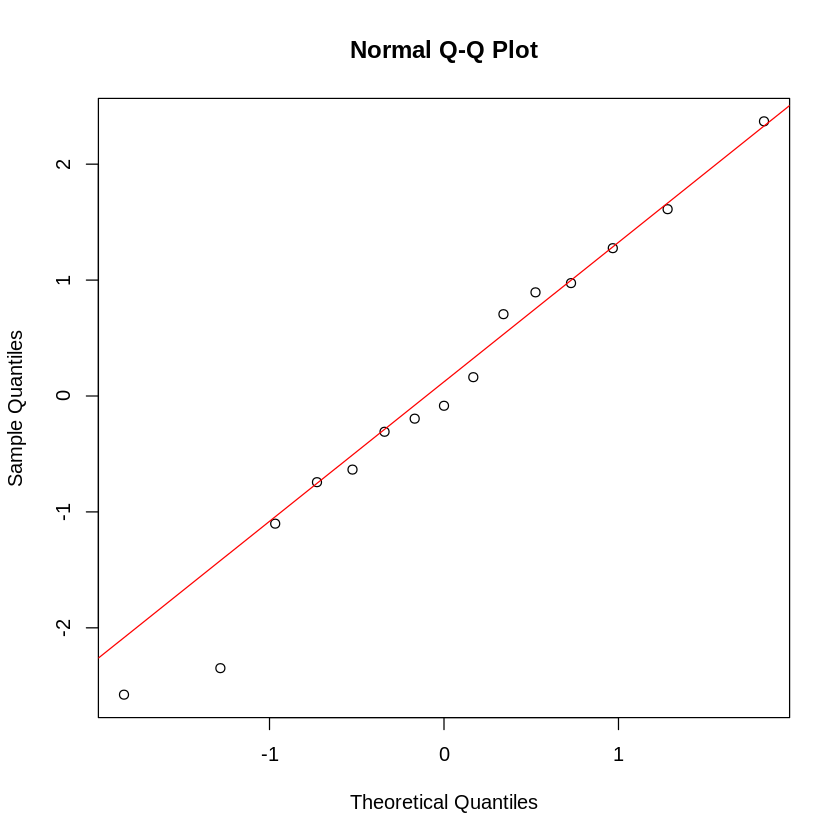

In [21]:
qqnorm(residuos)
qqline(residuos, col = 'red')

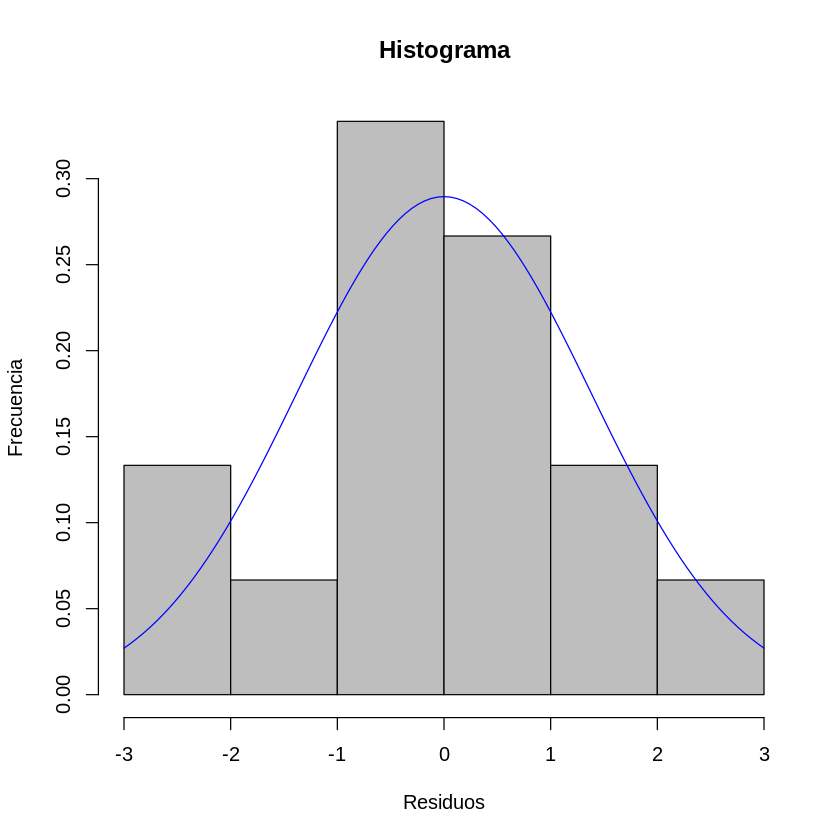

In [22]:
hist(residuos, prob=T, main = "Histograma", xlab = "Residuos", ylab = "Frecuencia", col = "gray")
x=residuos
m<-mean(x)
s<-sd(x)
curve(dnorm(x,mean=m,sd=s), col="blue", add=TRUE)

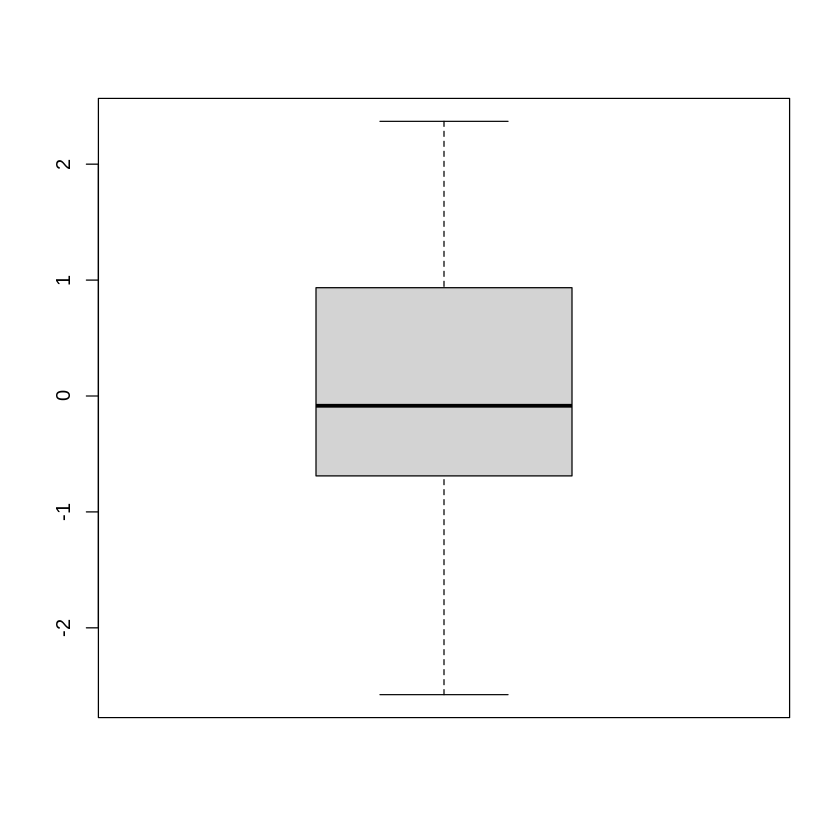

In [23]:
boxplot(residuos)

In [24]:
shapiro.test(residuos)


	Shapiro-Wilk normality test

data:  residuos
W = 0.97269, p-value = 0.8957


Dadas las gráficas y la prueba de normalidad, vemos que los residuos para el modelo 1 tienen una distribución normal.

#### Modelo 2

In [25]:
residuos2<-m2$residuals

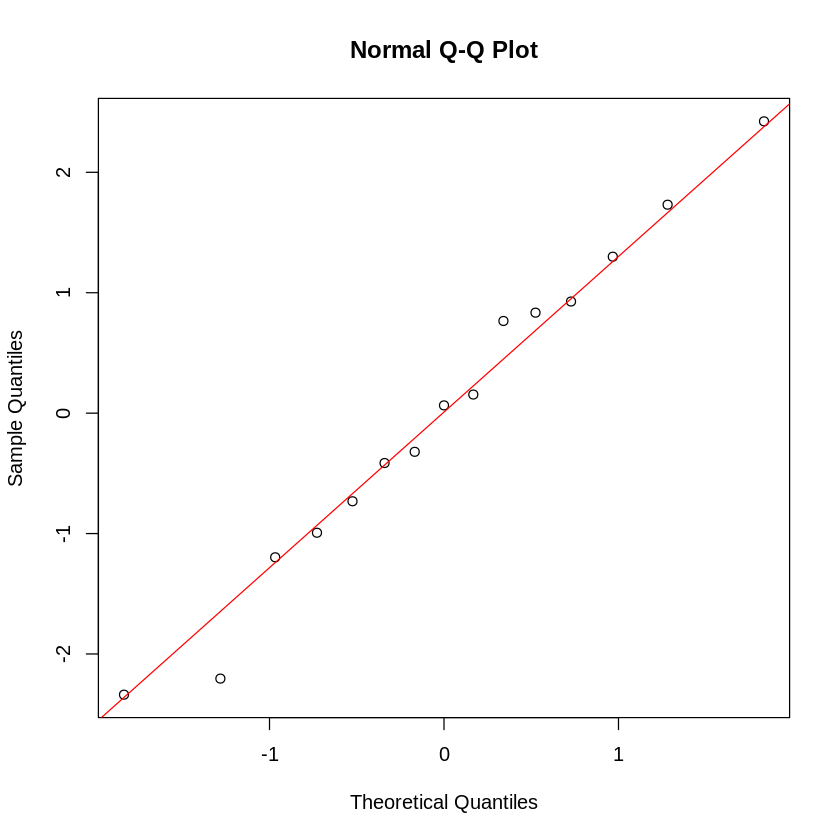

In [26]:
qqnorm(residuos2)
qqline(residuos2, col = 'red')

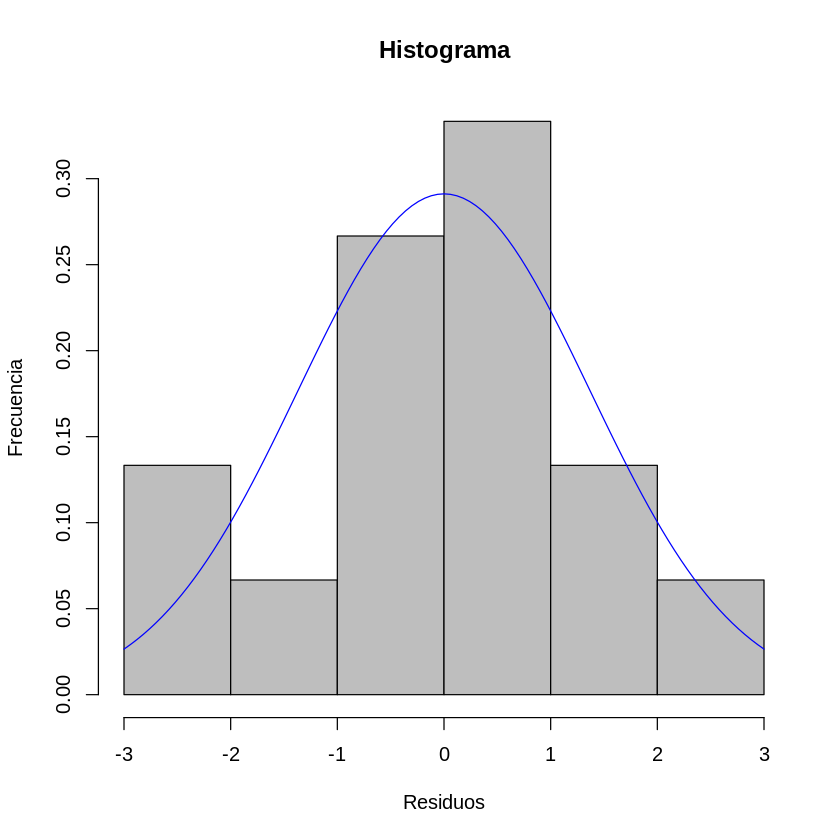

In [27]:
hist(residuos2, prob=T, main = "Histograma", xlab = "Residuos", ylab = "Frecuencia", col = "gray")
x=residuos2
m<-mean(x)
s<-sd(x)
curve(dnorm(x,mean=m,sd=s), col="blue", add=TRUE)

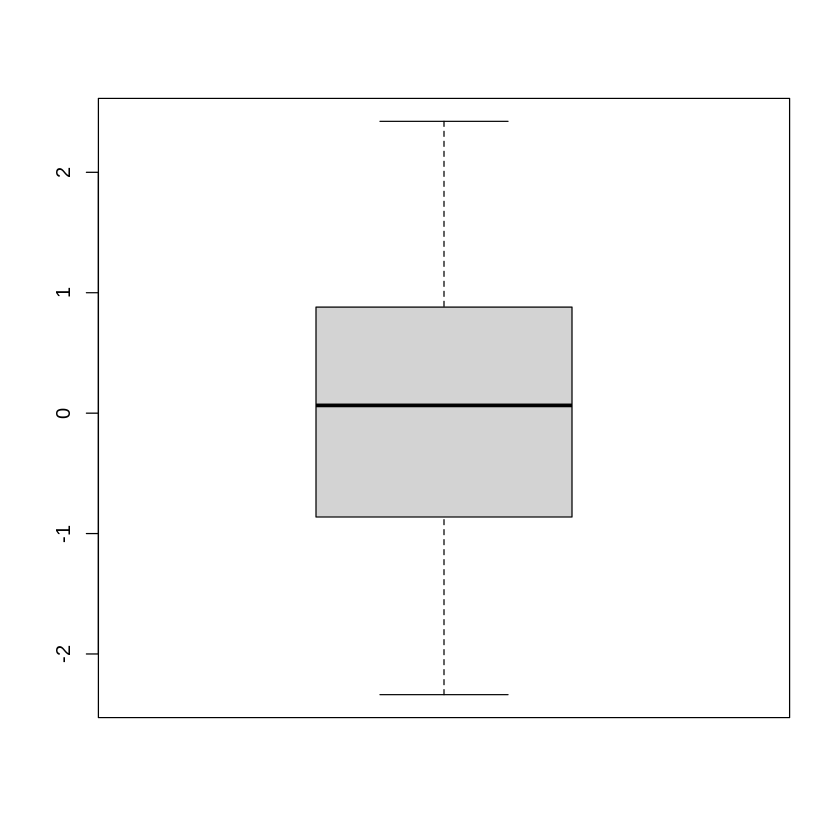

In [28]:
boxplot(residuos2)

In [32]:
shapiro.test(residuos2)


	Shapiro-Wilk normality test

data:  residuos2
W = 0.97936, p-value = 0.9649


También para el caso del modelo 2, los residuos tienen una distribución normal.